In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import patsy

In [36]:
np.random.normal(1500,150, 150)

array([1157.08755308, 1533.14887338, 1391.10201693, 1353.92214458,
       1294.247336  , 1621.70808561, 1512.07040303, 1757.54510641,
       1501.55417058, 1114.60337838, 1604.67857631, 1575.53068699,
       1316.21121771, 1329.90019504, 1501.40713629, 1480.6828412 ,
       1471.66269485, 1555.7946716 , 1834.57361901, 1258.21613014,
       1502.27380237, 1300.1713726 , 1319.58755152, 1545.63931383,
       1702.49841081, 1496.11442551, 1478.48384295, 1449.24342918,
       1468.12281805, 1579.40504236, 1736.80245443, 1575.89176043,
       1550.69743871, 1566.33242846, 1587.88408305, 1608.32728144,
       1397.45547447, 1472.07869238, 1456.78251839, 1687.42346097,
       1324.87773267, 1430.96383232, 1441.75326904, 1386.26622538,
       1423.56761816, 1551.68831625, 1515.58425543, 1570.02219299,
       1658.02350042, 1294.20484525, 1333.53705537, 1616.829001  ,
       1330.88474234, 1508.45500003, 1595.77819252, 1729.25873335,
       1633.37508233, 1514.90328923, 1411.25015869, 1351.01056

C:\Users\harish.daryani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


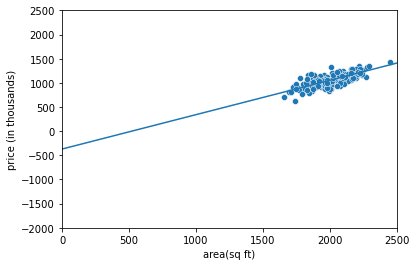

In [76]:
np.random.seed(321)
area = np.random.normal(2000,150, 150) 
price = -350 + .7*area + np.random.normal(0,100,150)
data = pd.DataFrame({'price':price,'area':area})
sns.scatterplot('area', 'price', data=data)
xs = np.array([0,2500])
ys = -370 + .7118*xs
plt.plot(xs,ys)
plt.xlim(0,2500)
plt.ylim(-2000,2500)
plt.xlabel('area(sq ft)')
plt.ylabel('price (in thousands)')
plt.show()

In [73]:
model = sm.OLS.from_formula('price ~ area', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     178.6
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           3.23e-27
Time:                        23:31:52   Log-Likelihood:                -893.88
No. Observations:                 150   AIC:                             1792.
Df Residuals:                     148   BIC:                             1798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -369.6106    106.746     -3.463      0.0

In [79]:
print(np.mean(data.area))
data['area_centered'] = data.area - np.mean(data.area)
data.head()

1998.9188488069165


,price,area,area_centered
0,1145.835373,2025.877920,26.959072
1,1271.342239,2245.322380,246.403531
2,1067.215833,2005.600460,6.681612
3,1057.184504,1867.377547,-131.541302
4,948.694333,1828.521162,-170.397687


C:\Users\harish.daryani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


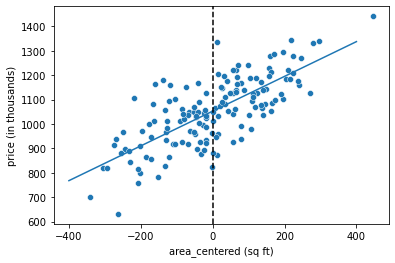

In [85]:
sns.scatterplot('area_centered', 'price', data=data)
xs = np.array([-400,400])
ys = 1053 + .7118*xs
plt.plot(xs,ys)
#sns.lmplot(x='area_centered',y='price',data=data)
plt.axvline(0,color='black',linestyle='--')
plt.xlabel('area_centered (sq ft)')
plt.ylabel('price (in thousands)')
plt.show()

In [84]:
model = sm.OLS.from_formula('price ~ area_centered', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     178.6
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           3.23e-27
Time:                        00:03:09   Log-Likelihood:                -893.88
No. Observations:                 150   AIC:                             1792.
Df Residuals:                     148   BIC:                             1798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1053.1466      7.703    136.712

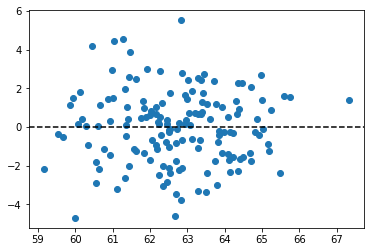

In [22]:
fitted_values = model.predict(data)
residuals = data.weight - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

(array([ 3.,  8., 21., 23., 31., 33., 17.,  9.,  3.,  2.]),
 array([-4.69693863, -3.67505904, -2.65317945, -1.63129986, -0.60942027,
         0.41245933,  1.43433892,  2.45621851,  3.4780981 ,  4.4999777 ,
         5.52185729]),
 <a list of 10 Patch objects>)

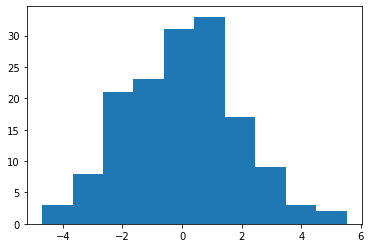

In [186]:
plt.hist(residuals)

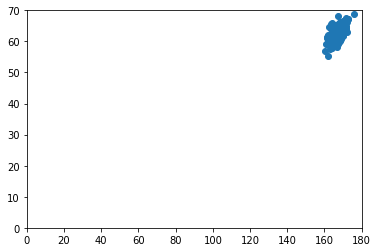

In [187]:
plt.scatter(data.height, data.weight)
plt.xlim(0,180)
plt.ylim(0,70)
plt.show()

In [188]:
data.height = data.height - np.mean(data.height)

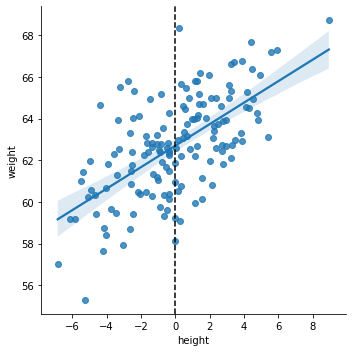

In [189]:
sns.lmplot('height', 'weight', data = data)
plt.axvline(0, color = 'black', linestyle = '--')
plt.show()

In [190]:
model = sm.OLS.from_formula('weight ~ height', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     94.06
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.61e-17
Time:                        10:35:16   Log-Likelihood:                -307.08
No. Observations:                 150   AIC:                             618.2
Df Residuals:                     148   BIC:                             624.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.7018      0.154    406.975      0.0

C:\Users\harish.daryani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


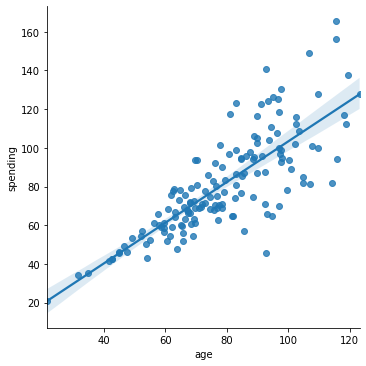

In [23]:
np.random.seed(3)
age = np.random.normal(40,20, 150) 
spending = 40 + age + np.random.normal(0,1,150)*age/3
age = age + 40
data2 = pd.DataFrame({'spending':spending,'age':age})
sns.lmplot('age', 'spending', data = data2)

In [24]:
model2 = sm.OLS.from_formula('spending ~ age', data=data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               spending   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     261.9
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.48e-34
Time:                        21:51:14   Log-Likelihood:                -623.96
No. Observations:                 150   AIC:                             1252.
Df Residuals:                     148   BIC:                             1258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9241      5.279     -0.364      0.7

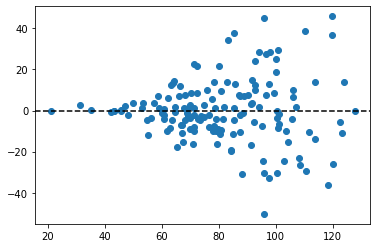

In [25]:
fitted_values = model2.predict(data2)
residuals = data2.spending - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

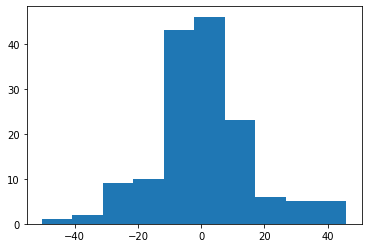

In [193]:
plt.hist(residuals)
plt.show()

In [26]:
data2['log_spending'] = np.log(data2.spending)
print(data2.head())

     spending         age  log_spending
0   93.992793  115.772569      4.543218
1  106.137987   88.730197      4.664740
2   64.865831   81.929949      4.172321
3   42.784399   42.730146      3.756174
4   74.480305   74.452236      4.310535


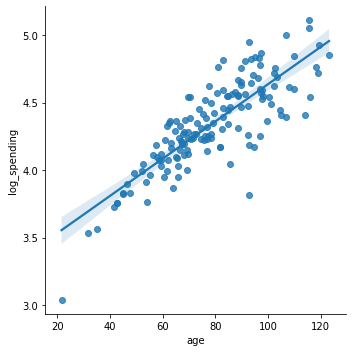

In [195]:
sns.lmplot('age', 'log_spending', data = data2)

In [27]:
model3 = sm.OLS.from_formula('log_spending ~ age', data=data2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           log_spending   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     322.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           5.64e-39
Time:                        22:00:55   Log-Likelihood:                 41.565
No. Observations:                 150   AIC:                            -79.13
Df Residuals:                     148   BIC:                            -73.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2549      0.062     52.102      0.0

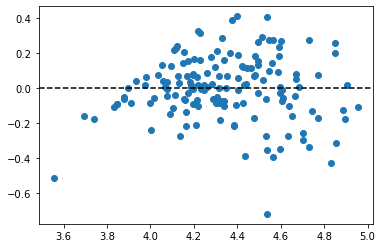

In [28]:
fitted_values = model3.predict(data2)
residuals = data2.log_spending - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

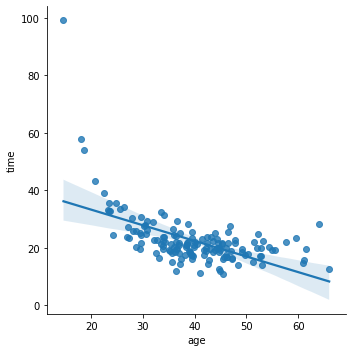

In [238]:
np.random.seed(111)
age = np.random.normal(-40,10, 150) 
time = 2 ** (-.3*age) + np.random.normal(0,40000,150)
age = age + 80
time = time + 200000
time = time/10000
data3 = pd.DataFrame({'time':time,'age':age})
sns.lmplot('age', 'time', data = data3)

In [239]:
model4 = sm.OLS.from_formula('time ~ age', data=data3).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     70.78
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           3.12e-14
Time:                        10:43:38   Log-Likelihood:                -516.67
No. Observations:                 150   AIC:                             1037.
Df Residuals:                     148   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1672      2.636     16.758      0.0

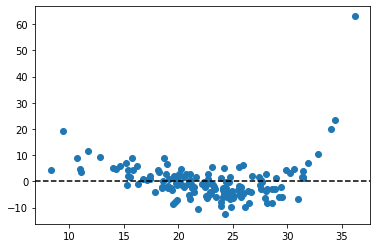

In [240]:
fitted_values = model4.predict(data3)
residuals = data3.time - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

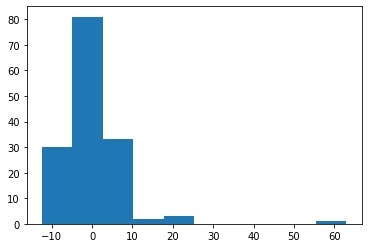

In [241]:
plt.hist(residuals)
plt.show()

In [242]:
data3['log_time'] = np.log(data3.time)
print(data3.head())

        time        age  log_time
0  20.401830  28.661617  3.015625
1  19.093524  43.843192  2.949349
2  19.083210  54.965538  2.948809
3  19.643086  36.446177  2.977725
4  22.705674  32.124665  3.122615


In [243]:
model5 = sm.OLS.from_formula('log_time ~ age', data=data3).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     84.41
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           3.37e-16
Time:                        10:43:56   Log-Likelihood:                 3.0805
No. Observations:                 150   AIC:                            -2.161
Df Residuals:                     148   BIC:                             3.860
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8033      0.082     46.144      0.0

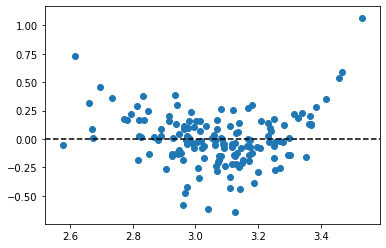

In [244]:
fitted_values = model5.predict(data3)
residuals = data3.log_time - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

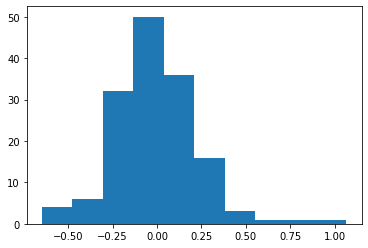

In [245]:
plt.hist(residuals)
plt.show()